## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.550839  0.837568 -0.784026  0.947290 -0.544305 -0.586934
1  0.911418  1.152037 -1.041006  0.292238 -1.251887  0.605169
2  1.187305 -1.076817 -0.684945 -1.577122 -0.292096 -1.206904
3  0.402490  1.291708  0.746988 -1.806533 -1.683723 -0.772975
4  1.440269  0.953297 -1.540910  1.309283 -1.126499  1.414390


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9107279	total: 58ms	remaining: 58s
1:	learn: 0.9017275	total: 58.5ms	remaining: 29.2s
2:	learn: 0.8924163	total: 58.9ms	remaining: 19.6s
3:	learn: 0.8827239	total: 59.5ms	remaining: 14.8s
4:	learn: 0.8740451	total: 60ms	remaining: 11.9s
5:	learn: 0.8661489	total: 60.5ms	remaining: 10s
6:	learn: 0.8565224	total: 61.1ms	remaining: 8.67s
7:	learn: 0.8479201	total: 61.7ms	remaining: 7.65s
8:	learn: 0.8403166	total: 62.1ms	remaining: 6.84s
9:	learn: 0.8333087	total: 62.6ms	remaining: 6.2s
10:	learn: 0.8251418	total: 63.3ms	remaining: 5.69s
11:	learn: 0.8165061	total: 63.9ms	remaining: 5.26s
12:	learn: 0.8091719	total: 64.4ms	remaining: 4.89s
13:	learn: 0.8026642	total: 64.9ms	remaining: 4.57s
14:	learn: 0.7966465	total: 65.4ms	remaining: 4.29s
15:	learn: 0.7893117	total: 65.9ms	remaining: 4.05s
16:	learn: 0.7813720	total: 66.3ms	remaining: 3.83s
17:	learn: 0.7738975	total: 66.8ms	remaining: 3.65s
18:	learn: 0.7670221	total: 67.2ms	remaining: 3.47s
1

103:	learn: 0.3744872	total: 107ms	remaining: 924ms
104:	learn: 0.3721013	total: 108ms	remaining: 920ms
105:	learn: 0.3696084	total: 108ms	remaining: 915ms
106:	learn: 0.3672688	total: 109ms	remaining: 908ms
107:	learn: 0.3644332	total: 109ms	remaining: 903ms
108:	learn: 0.3615313	total: 110ms	remaining: 899ms
109:	learn: 0.3594003	total: 110ms	remaining: 893ms
110:	learn: 0.3563345	total: 111ms	remaining: 889ms
111:	learn: 0.3538406	total: 112ms	remaining: 885ms
112:	learn: 0.3518876	total: 112ms	remaining: 879ms
113:	learn: 0.3493207	total: 112ms	remaining: 874ms
114:	learn: 0.3468262	total: 113ms	remaining: 870ms
115:	learn: 0.3441539	total: 113ms	remaining: 864ms
116:	learn: 0.3413959	total: 114ms	remaining: 859ms
117:	learn: 0.3393351	total: 114ms	remaining: 855ms
118:	learn: 0.3370185	total: 115ms	remaining: 851ms
119:	learn: 0.3348788	total: 116ms	remaining: 847ms
120:	learn: 0.3329394	total: 116ms	remaining: 843ms
121:	learn: 0.3304563	total: 116ms	remaining: 837ms
122:	learn: 

265:	learn: 0.1323299	total: 186ms	remaining: 515ms
266:	learn: 0.1313439	total: 187ms	remaining: 513ms
267:	learn: 0.1306580	total: 188ms	remaining: 513ms
268:	learn: 0.1298751	total: 188ms	remaining: 511ms
269:	learn: 0.1291809	total: 189ms	remaining: 510ms
270:	learn: 0.1283463	total: 189ms	remaining: 509ms
271:	learn: 0.1274471	total: 190ms	remaining: 508ms
272:	learn: 0.1266436	total: 190ms	remaining: 507ms
273:	learn: 0.1258625	total: 191ms	remaining: 505ms
274:	learn: 0.1250788	total: 191ms	remaining: 504ms
275:	learn: 0.1244878	total: 192ms	remaining: 503ms
276:	learn: 0.1236871	total: 192ms	remaining: 501ms
277:	learn: 0.1229824	total: 192ms	remaining: 500ms
278:	learn: 0.1222401	total: 193ms	remaining: 499ms
279:	learn: 0.1216530	total: 194ms	remaining: 498ms
280:	learn: 0.1208642	total: 194ms	remaining: 496ms
281:	learn: 0.1200691	total: 195ms	remaining: 495ms
282:	learn: 0.1193544	total: 195ms	remaining: 494ms
283:	learn: 0.1186552	total: 196ms	remaining: 493ms
284:	learn: 

471:	learn: 0.0457298	total: 290ms	remaining: 324ms
472:	learn: 0.0456124	total: 291ms	remaining: 324ms
473:	learn: 0.0453807	total: 291ms	remaining: 323ms
474:	learn: 0.0452658	total: 291ms	remaining: 322ms
475:	learn: 0.0451441	total: 292ms	remaining: 321ms
476:	learn: 0.0450250	total: 293ms	remaining: 321ms
477:	learn: 0.0449084	total: 293ms	remaining: 320ms
478:	learn: 0.0446382	total: 293ms	remaining: 319ms
479:	learn: 0.0445245	total: 294ms	remaining: 318ms
480:	learn: 0.0444132	total: 294ms	remaining: 318ms
481:	learn: 0.0443043	total: 295ms	remaining: 317ms
482:	learn: 0.0440209	total: 295ms	remaining: 316ms
483:	learn: 0.0439447	total: 296ms	remaining: 315ms
484:	learn: 0.0438393	total: 296ms	remaining: 315ms
485:	learn: 0.0435621	total: 297ms	remaining: 314ms
486:	learn: 0.0434885	total: 297ms	remaining: 313ms
487:	learn: 0.0433864	total: 298ms	remaining: 312ms
488:	learn: 0.0431238	total: 298ms	remaining: 312ms
489:	learn: 0.0430208	total: 299ms	remaining: 311ms
490:	learn: 

636:	learn: 0.0231960	total: 370ms	remaining: 211ms
637:	learn: 0.0231426	total: 370ms	remaining: 210ms
638:	learn: 0.0230108	total: 371ms	remaining: 209ms
639:	learn: 0.0229631	total: 371ms	remaining: 209ms
640:	learn: 0.0229115	total: 371ms	remaining: 208ms
641:	learn: 0.0228123	total: 372ms	remaining: 207ms
642:	learn: 0.0227660	total: 372ms	remaining: 207ms
643:	learn: 0.0226593	total: 373ms	remaining: 206ms
644:	learn: 0.0226252	total: 373ms	remaining: 205ms
645:	learn: 0.0225915	total: 374ms	remaining: 205ms
646:	learn: 0.0224949	total: 374ms	remaining: 204ms
647:	learn: 0.0224615	total: 375ms	remaining: 203ms
648:	learn: 0.0223574	total: 375ms	remaining: 203ms
649:	learn: 0.0223243	total: 376ms	remaining: 202ms
650:	learn: 0.0222593	total: 376ms	remaining: 202ms
651:	learn: 0.0222266	total: 377ms	remaining: 201ms
652:	learn: 0.0221328	total: 377ms	remaining: 200ms
653:	learn: 0.0221004	total: 377ms	remaining: 200ms
654:	learn: 0.0220685	total: 378ms	remaining: 199ms
655:	learn: 

849:	learn: 0.0108415	total: 472ms	remaining: 83.3ms
850:	learn: 0.0107985	total: 473ms	remaining: 82.7ms
851:	learn: 0.0107585	total: 473ms	remaining: 82.2ms
852:	learn: 0.0107215	total: 473ms	remaining: 81.6ms
853:	learn: 0.0107029	total: 474ms	remaining: 81ms
854:	learn: 0.0106587	total: 474ms	remaining: 80.4ms
855:	learn: 0.0106351	total: 475ms	remaining: 79.9ms
856:	learn: 0.0106093	total: 475ms	remaining: 79.3ms
857:	learn: 0.0105839	total: 476ms	remaining: 78.7ms
858:	learn: 0.0105231	total: 476ms	remaining: 78.2ms
859:	learn: 0.0104703	total: 476ms	remaining: 77.6ms
860:	learn: 0.0104474	total: 478ms	remaining: 77.1ms
861:	learn: 0.0104228	total: 478ms	remaining: 76.5ms
862:	learn: 0.0103986	total: 478ms	remaining: 75.9ms
863:	learn: 0.0103490	total: 479ms	remaining: 75.4ms
864:	learn: 0.0102912	total: 479ms	remaining: 74.8ms
865:	learn: 0.0102691	total: 480ms	remaining: 74.2ms
866:	learn: 0.0102137	total: 480ms	remaining: 73.7ms
867:	learn: 0.0101904	total: 481ms	remaining: 73

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

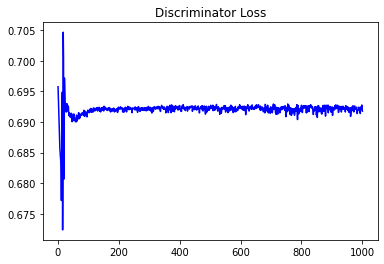

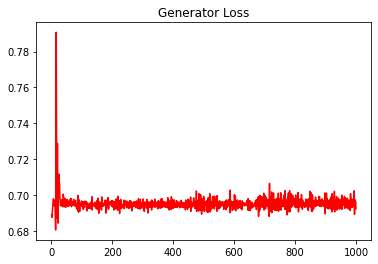

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.03422805168373981


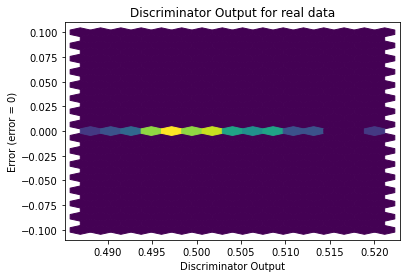

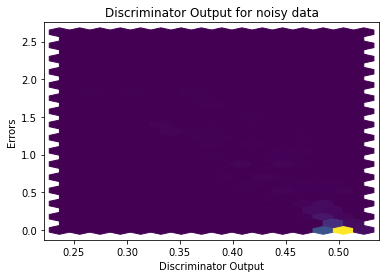

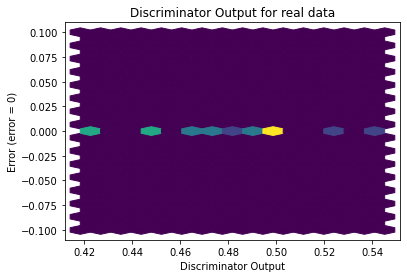

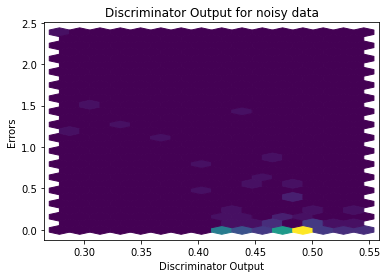

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


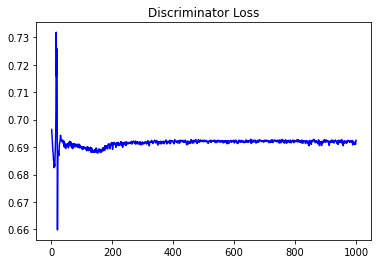

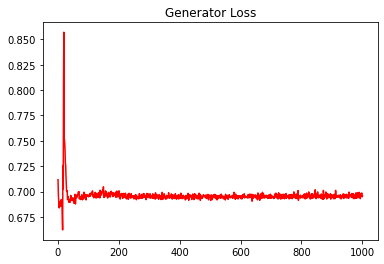

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.060151753953509995


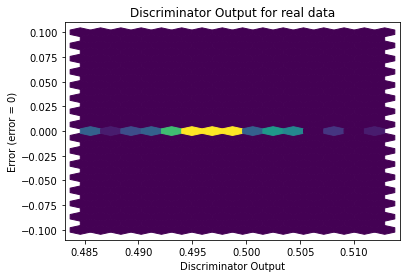

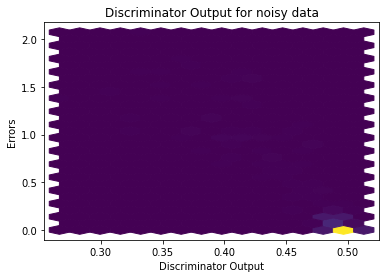

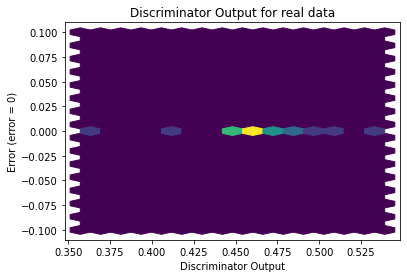

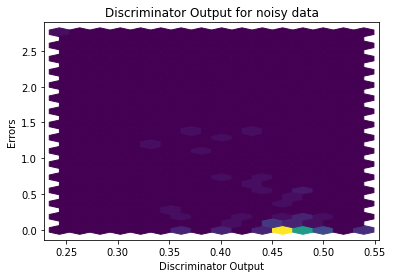

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8042]], requires_grad=True)
